In [2]:
import seaborn as sns
import sqlite3
import pandas as pd

In [10]:
with sqlite3.connect('C:/Users/Rodrigo/Desktop/UP/2017-04/DataAnalisys/Clase2/Data/database.sqlite'):

SyntaxError: unexpected EOF while parsing (<ipython-input-10-ee299ce1be42>, line 1)

In [11]:
with sqlite3.connect('C:/Users/Rodrigo/Desktop/UP/2017-04/DataAnalisys/Clase2/Data/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)

In [12]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [13]:
matches.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Los datos de march_api, home_team_api_id esta NORMALIZADA para evitar problemas al manejar los nombres de cada equipo

In [16]:
leagues.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [17]:
teams.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


Con lo siguiente filtramos la informacion, creando una nueva tabla de country

In [18]:
selected_country = ['Spain', 'England', 'Germany', 'Italy', 'France']

In [19]:
countries = countries[countries.name.isin(selected_country)]

Reviso que ahora solo hay paises de los filtrados

In [22]:
countries.name.unique()

array(['England', 'France', 'Germany', 'Italy', 'Spain'], dtype=object)

Con 'on' se indica que columnas se usan para unir, suffixes indica que se agrega al titulo de la tabla lo indicado entre '' para poder distinguir cual columna viene de donde.

In [24]:
countries.merge(leagues, on = 'id', suffixes = ('', '_y'))

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,4769,France,4769,France Ligue 1
2,7809,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,10257,Italy Serie A
4,21518,Spain,21518,Spain LIGA BBVA


In [25]:
countries = countries.merge(leagues, on = 'id', suffixes = ('', '_y'))

In [26]:
countries.head()

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,4769,France,4769,France Ligue 1
2,7809,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,10257,Italy Serie A
4,21518,Spain,21518,Spain LIGA BBVA


Asi seleccionamos solo los partidos de los paises incluidos en countries.id (o sea los 5 paises que seleccionamos arriba)

In [27]:
matches1 = matches[matches.league_id.isin(countries.id)]

In [28]:
matches1.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75


Con la siguiente linea seleccionamos solo las columnas que necesitamos

In [31]:
matches2 = matches1[['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'B365H', 'B365A', 'B365D']]

In [32]:
matches2.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365A,B365D
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,11.00,5.5
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,15.00,6.5
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,1.67,3.6
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,4.20,3.4
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,4.33,3.4


In [33]:
matches2.size

175020

In [38]:
%matplotlib inline

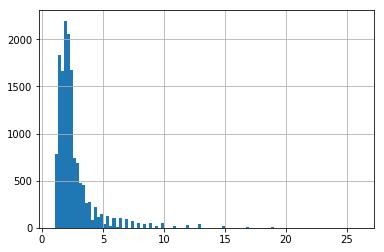

In [39]:
matches2.B365H.hist(bins=100)

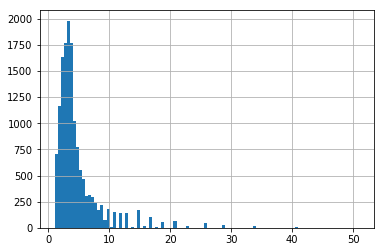

In [40]:
matches2.B365A.hist(bins=100)

In [41]:
matches_teams = matches[matches.B365A < matches.B365H]

momios de visitante esta en B365A y el de casa es B365H

abajo instrucciones para ver que equipos tienen mejor momio, incluso si son visitantes

In [42]:
list_teams = matches_teams.away_team_api_id.unique()
teams[teams.team_api_id.isin(list_teams)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
9,10,9985,232.0,Standard de Liège,STL
10,11,8203,110724.0,KV Mechelen,MEC


Abajo instrucciones para ver que equipos tienen mejor momio, incluso si son visitantes, que sean 15 veces mas posibles que los demas

In [44]:
matches_teams = matches[15*matches.B365A < matches.B365H]
list_teams = matches_teams.away_team_api_id.unique()
teams[teams.team_api_id.isin(list_teams)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
94,15617,9823,21.0,FC Bayern Munich,BMU
139,20528,8636,44.0,Inter,INT
205,35283,9773,236.0,FC Porto,POR
256,43040,8633,243.0,Real Madrid CF,REA
258,43042,8634,241.0,FC Barcelona,BAR
